In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Date Preprocessing, Understanding and Exploration

####  Load dataset

In [248]:
df = pd.read_csv("data/US_Accidents_Dec20_updated.csv")

In [249]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2953938,2,2020-11-01 22:33:04,2020-11-02 00:11:16,39.594265,-76.671599,39.588595,-76.675189,0.436,Incident on I-83 SB near EXIT 27 Road closed. ...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2953939,2,2020-12-14 14:19:00,2020-12-14 17:06:29,37.701913,-121.910487,37.701983,-121.917087,0.361,WB 580 JEO 680. SV BIG RIG FB TRLR,...,False,False,False,False,False,False,Day,Day,Day,Day
2,A-2953941,2,2020-10-15 23:03:55,2020-10-16 00:20:53,39.446521,-76.330792,39.455652,-76.312348,1.169,Incident on I-95 NB near EXIT 74 Drive with ca...,...,False,False,False,False,False,False,Night,Night,Night,Night
3,A-2953942,2,2020-12-01 14:15:55,2020-12-01 16:15:42,39.221910,-76.801697,39.228970,-76.811217,0.705,Incident on MD-100 WB near EXIT 2 Drive with c...,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-2953943,4,2020-10-17 18:08:00,2020-10-17 20:11:27,39.587999,-77.643910,39.600499,-77.677250,1.974,I-70 WEST AT MM 33.0,...,False,False,False,False,False,False,Day,Day,Day,Day


#### Data description

In [250]:
print('Rows     :', df.shape[0])
print('Columns  :', df.shape[1])
print('\nFeatures :\n     :', df.columns.tolist())
print('\nMissing values    :', df.isnull().values.sum())
print('\nUnique values :  \n', df.nunique())

Rows     : 1034742
Columns  : 47

Features :
     : ['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']

Missing values    : 1101126

Unique values :  
 ID                       1034742
Severity                       4
Start_Time                662179
End_Time                  785318
Start_Lat                 429003
Start_Lng                 436283
End_Lat                   426758
End_Lng   

### Data Cleaing

#### Drop features with high missing value rate and are not useful in our analysis and modeling

In [251]:
df.drop(['ID','Description','Country','Zipcode', 'Turning_Loop','Number','Street',
         'Airport_Code','Weather_Timestamp','Wind_Chill(F)','Wind_Direction',
        'Civil_Twilight', 'Nautical_Twilight','Astronomical_Twilight', 'Start_Lat', 
         'Start_Lng', 'End_Lat', 'End_Lng'], axis=1, inplace=True)
df.shape

(1034742, 29)

#### Missing values visualization

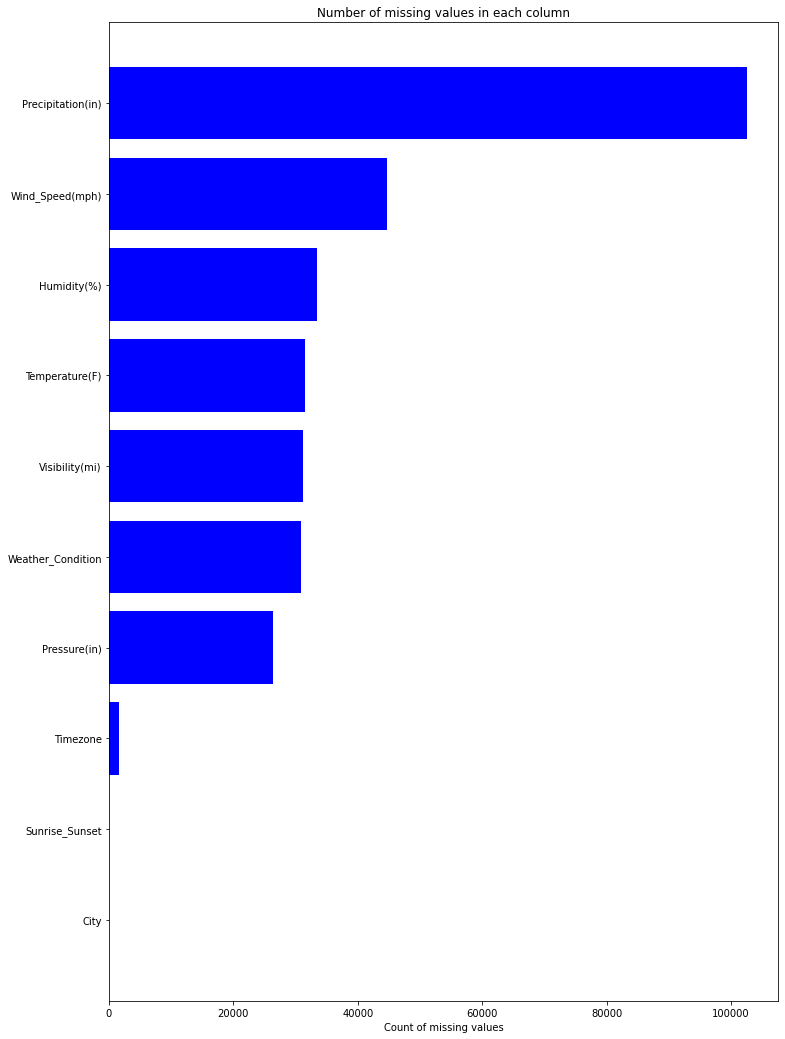

In [252]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name','missing_count']
missing_df = missing_df[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
width = 0.5
fig,ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind,missing_df.missing_count.values,color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

#### Fill missing values with proper values

In [253]:
df["Precipitation(in)"].fillna(0, inplace=True)
df['Wind_Speed(mph)'] = df['Wind_Speed(mph)'].fillna(df['Wind_Speed(mph)'].median())
df['Temperature(F)'] = df['Temperature(F)'].fillna(df['Temperature(F)'].median())
df['Humidity(%)'] = df['Humidity(%)'].fillna(df['Humidity(%)'].median())
df['Visibility(mi)'] = df['Visibility(mi)'].fillna(df['Visibility(mi)'].median())
df['Pressure(in)'] = df['Pressure(in)'].fillna(df['Pressure(in)'].median())

#### Drop the rest of missing values

In [254]:
df = df[df['Weather_Condition'].notna()]

In [255]:
df = df[df['City'].notna()]

In [256]:
df.isnull().sum()

Severity             0
Start_Time           0
End_Time             0
Distance(mi)         0
Side                 0
City                 0
County               0
State                0
Timezone             0
Temperature(F)       0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Speed(mph)      0
Precipitation(in)    0
Weather_Condition    0
Amenity              0
Bump                 0
Crossing             0
Give_Way             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Station              0
Stop                 0
Traffic_Calming      0
Traffic_Signal       0
Sunrise_Sunset       0
dtype: int64

In [257]:
# new dataframe shape
df.shape

(1003813, 29)

### Analysis

We want to explore data to find features affecting the accident severity

In [258]:
df.groupby('Severity').size()

Severity
1     27791
2    851351
3     75055
4     49616
dtype: int64

#### As you can see dataset is imbalanced

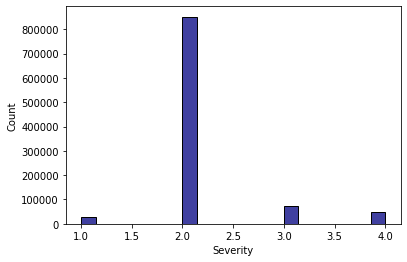

In [259]:
sev_p = sns.histplot(df, x="Severity", color = 'navy')

### Weather Condition Analysis

In [260]:
df.loc[df["Severity"] == 1]['Weather_Condition'].value_counts()

Fair                         13900
Mostly Cloudy                 4683
Cloudy                        3506
Partly Cloudy                 2648
Light Rain                    1385
Rain                           271
Fair / Windy                   231
Fog                            195
Mostly Cloudy / Windy          136
Partly Cloudy / Windy           85
Heavy Rain                      80
Light Drizzle                   75
Cloudy / Windy                  72
Haze                            70
Light Rain with Thunder         64
Light Snow                      64
T-Storm                         62
Heavy T-Storm                   45
Thunder                         45
Thunder in the Vicinity         30
Light Rain / Windy              29
Snow                            27
Rain / Windy                    13
Heavy Rain / Windy              10
Blowing Dust / Windy             8
Heavy T-Storm / Windy            7
Showers in the Vicinity          7
Light Rain Shower                6
Shallow Fog         

#### Find distribution of diffrent weather conditions

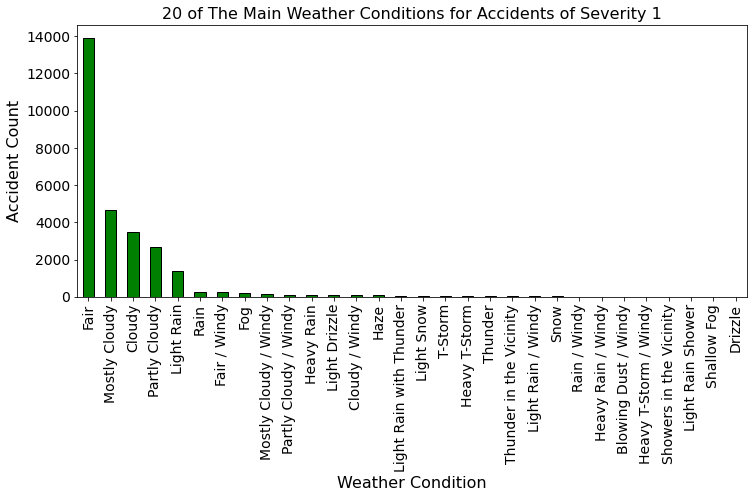

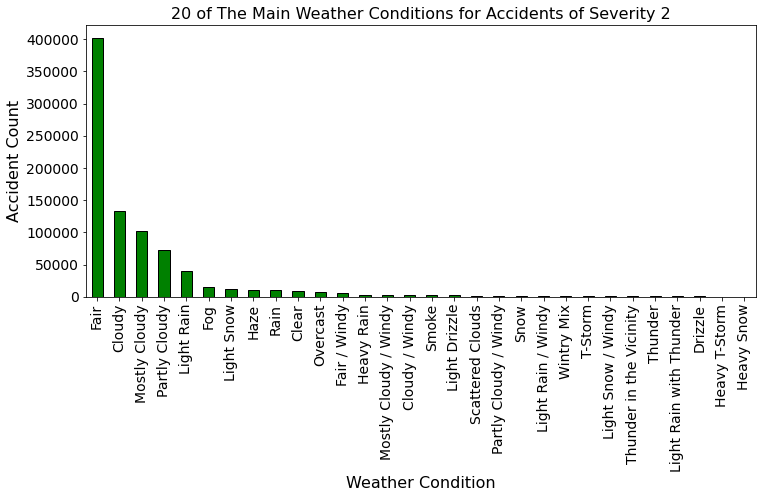

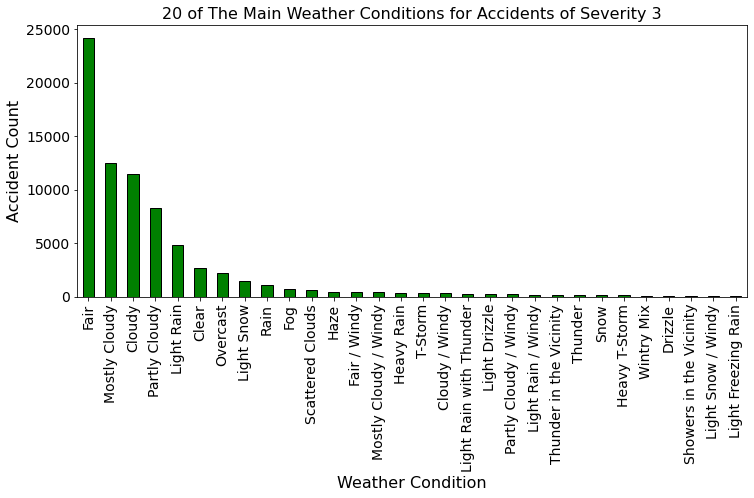

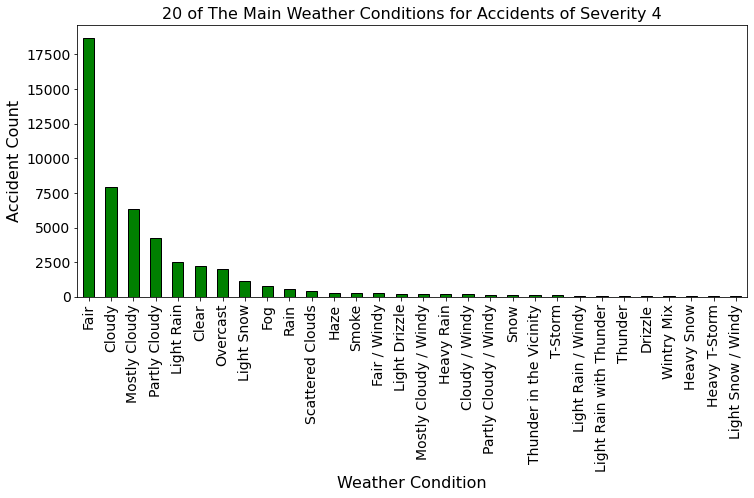

In [261]:
for s in np.arange(1,5):
    plt.subplots(figsize=(12,5))
    df.loc[df["Severity"] == s]['Weather_Condition'].value_counts().sort_values(ascending=False).head(30).plot.bar(width=0.5,color='g',edgecolor='k',align='center',linewidth=1)
    plt.xlabel('Weather Condition',fontsize=16)
    plt.ylabel('Accident Count',fontsize=16)
    plt.title('20 of The Main Weather Conditions for Accidents of Severity ' + str(s),fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

####  Find distribution of diffrent Temperature

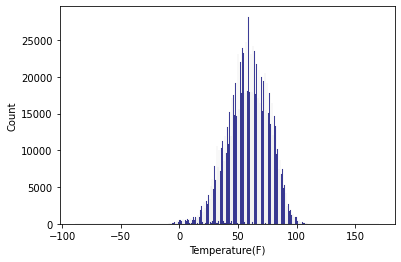

In [262]:
sev_tem = sns.histplot(df, x="Temperature(F)", color = 'navy')

#### Joint Distribution Temperature by Severity

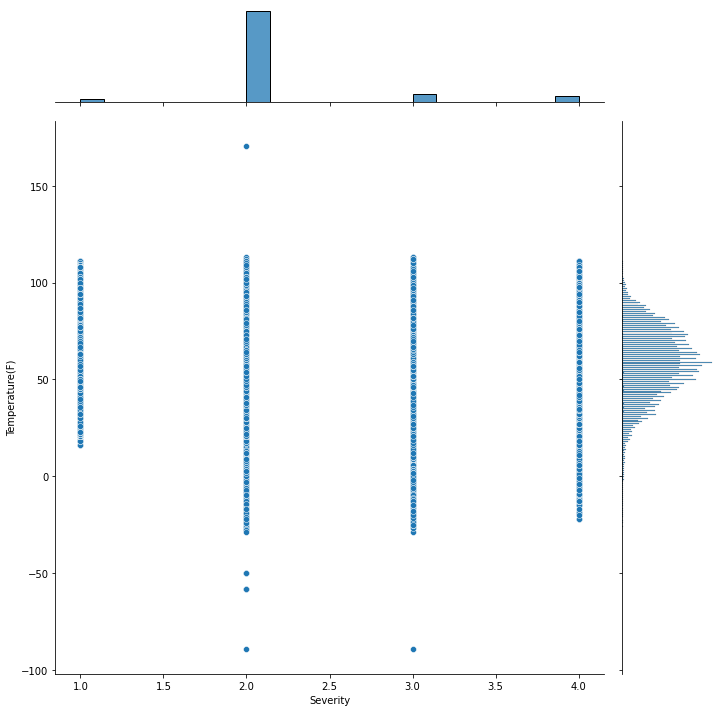

In [263]:
sns.jointplot(x = "Severity", y = "Temperature(F)", data = df, height=10)
plt.show()

As you can see cold weather increases the risk of accidents.

#### Joint Distribution Humidity by Severity

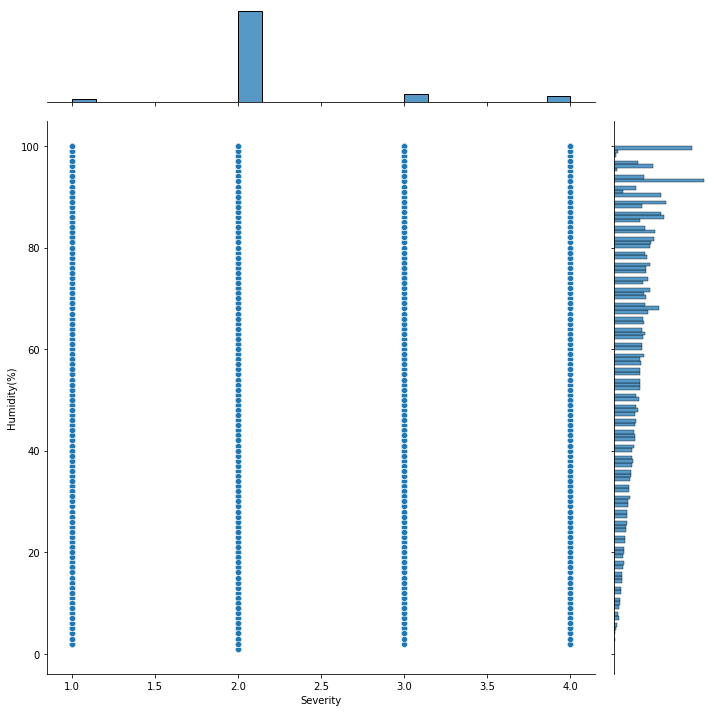

In [264]:
sns.jointplot(x = "Severity", y = "Humidity(%)", data = df, height=10)
plt.show()

As you can see more humidity increases the risk of accidents.

### Time Analysis
exploring the severty of accident by day of the week

In [265]:
df['time'] = pd.to_datetime(df.Start_Time, format='%Y-%m-%d %H:%M:%S')

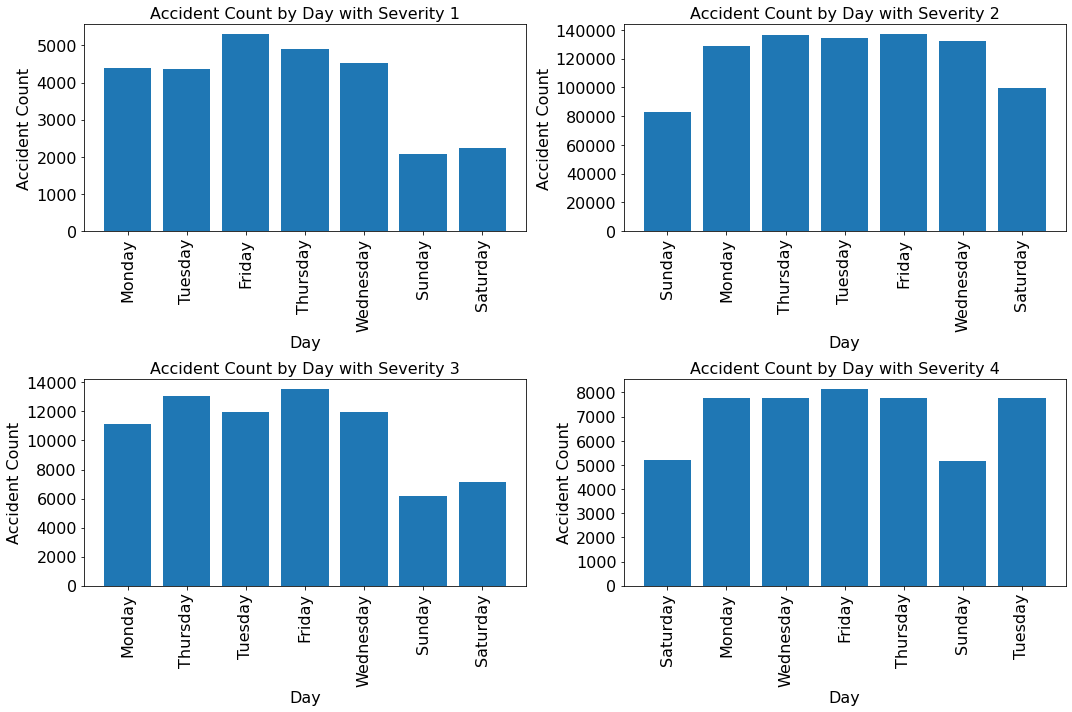

In [266]:
df['WeekDay'] = df['time'].dt.strftime('%A')
plt.subplots(2,2,figsize=(15,10))
for s in np.arange(1,5):
    plt.subplot(2,2,s)
    plt.hist(df.loc[df["Severity"] == s]['WeekDay'], bins=[0,1,2,3,4,5,6,7], align='left', rwidth=0.8)
    plt.title("Accident Count by Day with Severity " + str(s), fontsize=16)
    plt.xticks(rotation = 90)
    plt.xlabel("Day", fontsize=16)
    plt.ylabel("Accident Count", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

### Infrastructure Analysis

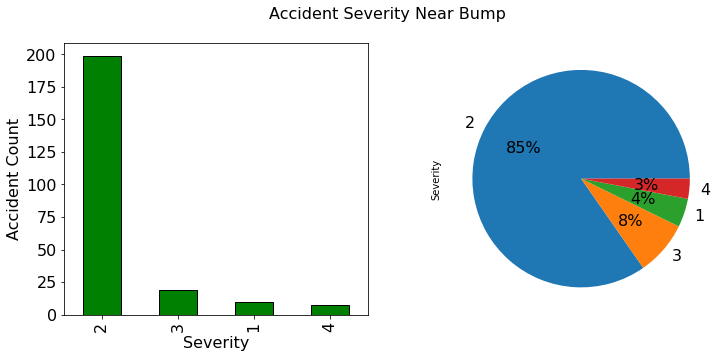

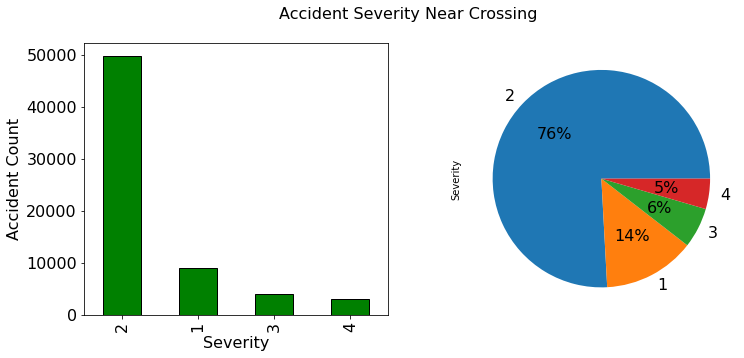

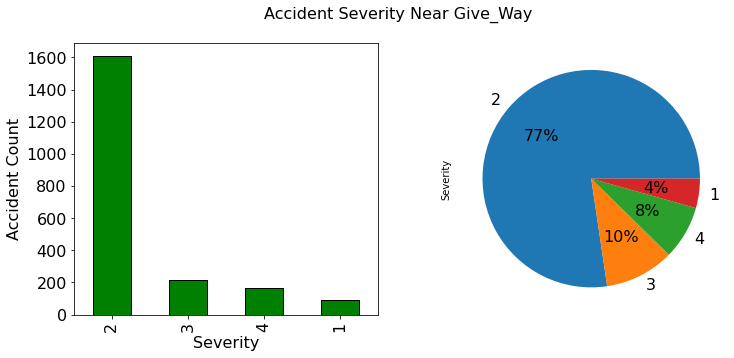

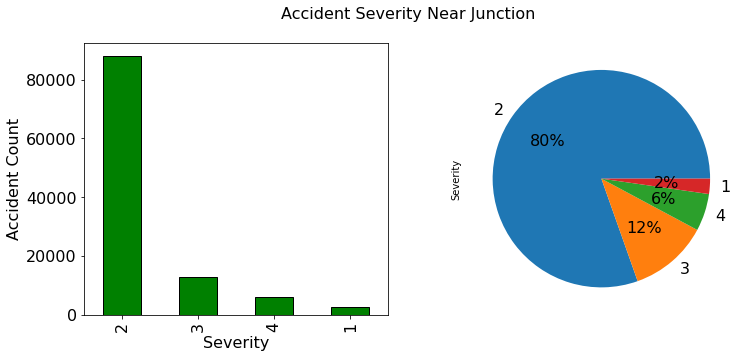

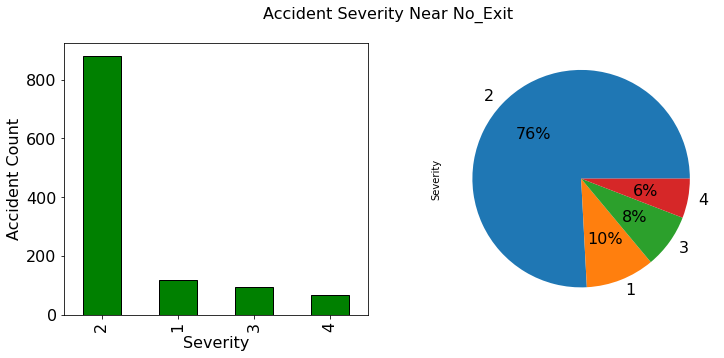

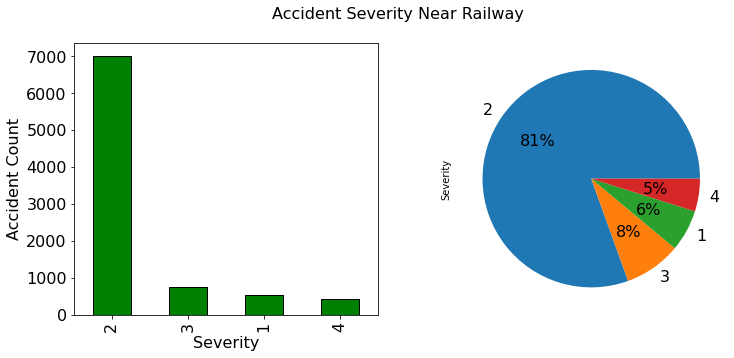

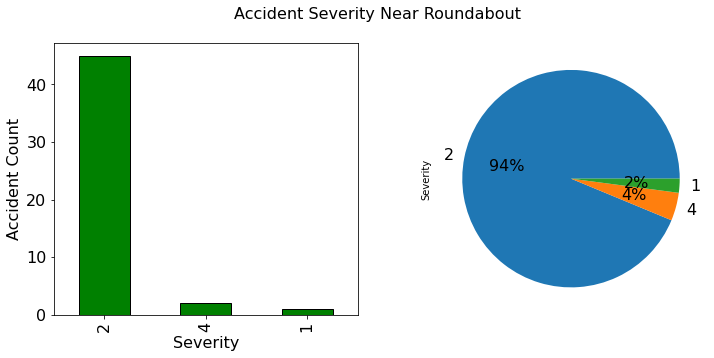

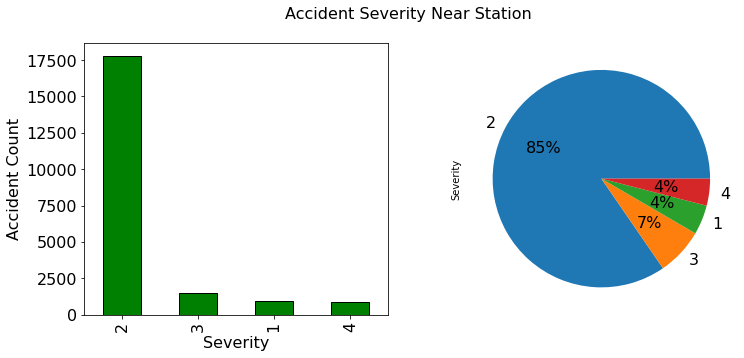

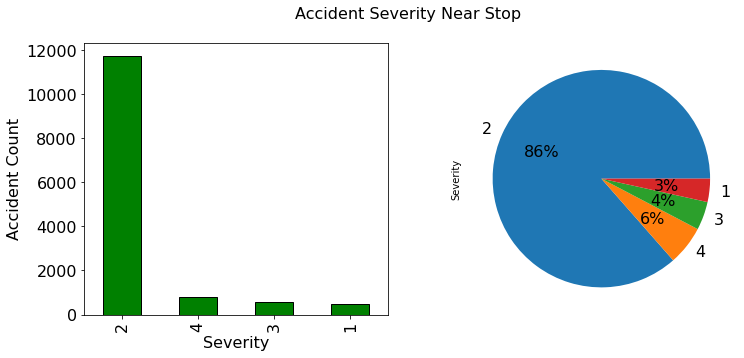

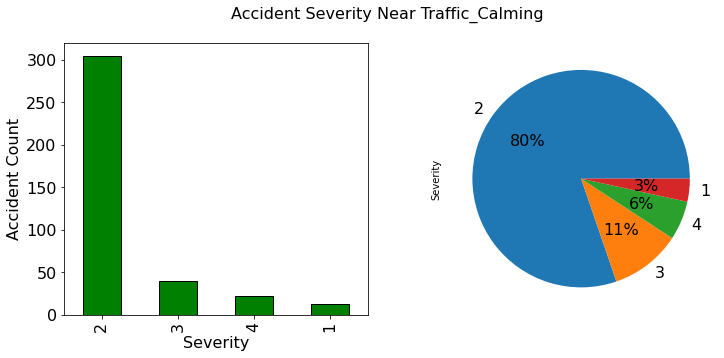

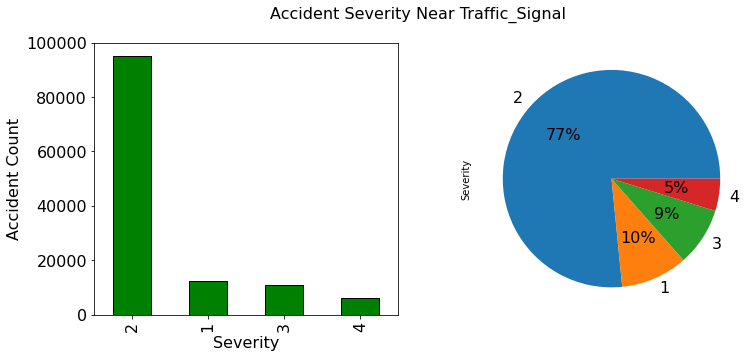

In [267]:
for s in ['Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal']:
    # check if infrastructure type is found in any record 
    if (df[s] == True).sum() > 0:
        plt.subplots(1,2,figsize=(12,5))
        plt.xticks(fontsize=14)
        plt.suptitle('Accident Severity Near ' + s,fontsize=16)
        plt.subplot(1,2,1)
        df.loc[df[s] == True]['Severity'].value_counts().plot.bar(width=0.5,color='g',edgecolor='k',align='center',linewidth=1)
        plt.xlabel('Severity',fontsize=16)
        plt.ylabel('Accident Count',fontsize=16)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        plt.subplot(1,2,2)
        df.loc[df[s] == True]['Severity'].value_counts().plot.pie(autopct='%1.0f%%',fontsize=16)

### Geographical Analysis Analysis

#### Severity by each state

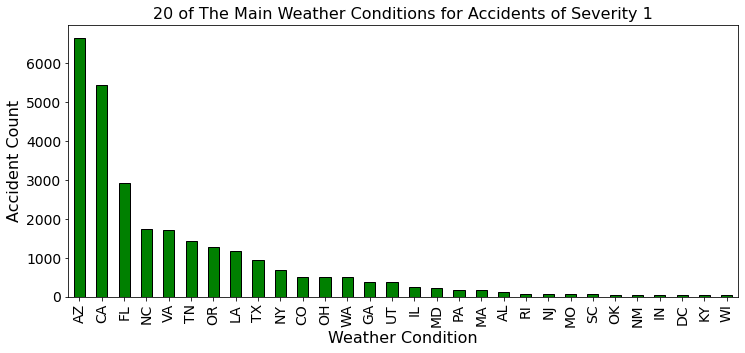

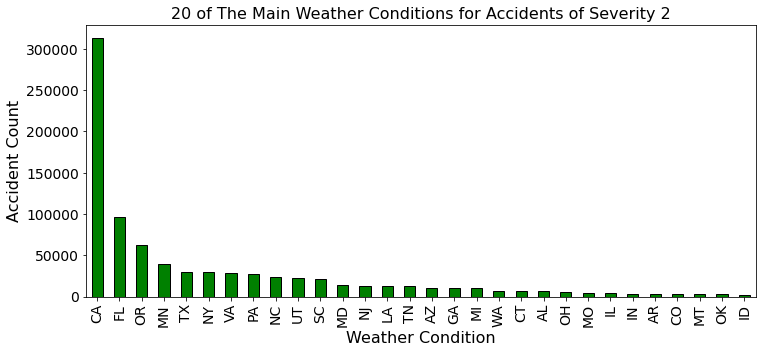

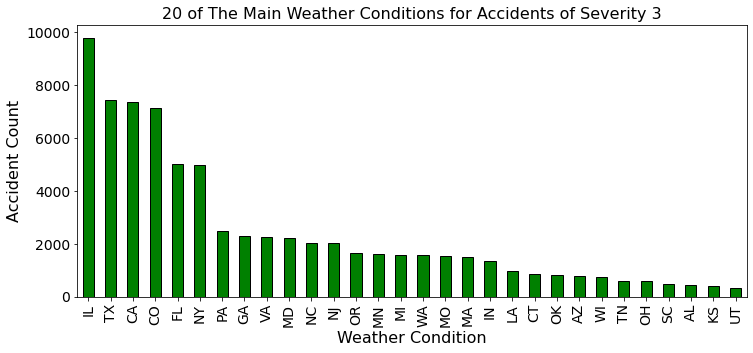

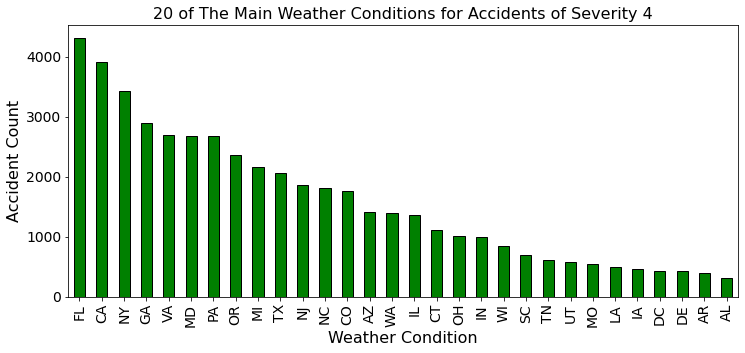

In [268]:
for s in np.arange(1,5):
    plt.subplots(figsize=(12,5))
    df.loc[df["Severity"] == s]['State'].value_counts().sort_values(ascending=False).head(30).plot.bar(width=0.5,color='g',edgecolor='k',align='center',linewidth=1)
    plt.xlabel('Weather Condition',fontsize=16)
    plt.ylabel('Accident Count',fontsize=16)
    plt.title('20 of The Main Weather Conditions for Accidents of Severity ' + str(s),fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

## Feature Engineering

#### From the features related to time we just need day of the week.
Creating numeric value and drop the rest of columns

In [269]:
df['numeric_DayOfWeek'] = df['time'].dt.dayofweek

In [270]:
df['numeric_DayOfWeek'].head()

0    6
1    0
2    3
3    1
4    5
Name: numeric_DayOfWeek, dtype: int64

Drop the rest of time columns

In [271]:
df.drop(['Start_Time', 'End_Time', 'time','Timezone','WeekDay'], axis=1, inplace=True)
df.shape

(1003813, 27)

Obviously, city and county are a subset of state, so we will drop those.

In [272]:
df.drop(['City','County'], axis=1, inplace=True)
df.shape

(1003813, 25)

In [273]:
df.columns

Index(['Severity', 'Distance(mi)', 'Side', 'State', 'Temperature(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset',
       'numeric_DayOfWeek'],
      dtype='object')

### Handeling the Catorigal data

Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric.

#### Check the columns type

In [274]:
for i in df.columns:
    print(i+": "+str(df[i].dtype))

Severity: int64
Distance(mi): float64
Side: object
State: object
Temperature(F): float64
Humidity(%): float64
Pressure(in): float64
Visibility(mi): float64
Wind_Speed(mph): float64
Precipitation(in): float64
Weather_Condition: object
Amenity: bool
Bump: bool
Crossing: bool
Give_Way: bool
Junction: bool
No_Exit: bool
Railway: bool
Roundabout: bool
Station: bool
Stop: bool
Traffic_Calming: bool
Traffic_Signal: bool
Sunrise_Sunset: object
numeric_DayOfWeek: int64


#### Cleaning the Weather_Condition column

In [275]:
# List of unique value
df['Weather_Condition'].unique()

array(['Partly Cloudy / Windy', 'Fair', 'Cloudy', 'Mostly Cloudy',
       'Partly Cloudy', 'Cloudy / Windy', 'Light Rain', 'Rain', 'Mist',
       'Heavy Snow', 'Light Snow', 'Fog', 'Light Rain / Windy', 'Haze',
       'Smoke', 'Snow', 'Thunder in the Vicinity', 'Haze / Windy',
       'Fair / Windy', 'Mostly Cloudy / Windy', 'Wintry Mix',
       'Light Drizzle', 'T-Storm', 'Heavy Rain / Windy',
       'Light Snow / Windy', 'Heavy Rain', 'Light Rain Shower',
       'Smoke / Windy', 'N/A Precipitation', 'Thunder', 'Patches of Fog',
       'Drizzle', 'Heavy Drizzle', 'Heavy T-Storm',
       'Light Rain with Thunder', 'Shallow Fog', 'Heavy Snow / Windy',
       'Rain / Windy', 'Snow / Windy', 'Fog / Windy', 'Partial Fog',
       'Light Freezing Rain / Windy', 'Sleet', 'Blowing Snow / Windy',
       'Light Drizzle / Windy', 'Showers in the Vicinity',
       'Snow and Sleet', 'Snow and Sleet / Windy', 'Squalls / Windy',
       'Light Freezing Rain', 'Wintry Mix / Windy',
       'Blowing Dust 

In [276]:
df['Weather_Condition'].nunique()

101

#### Categorizing conditions based on their severity

In [277]:
df['Weather_Condition'][df['Weather_Condition'].str.contains('Rain')].nunique()

19

In [278]:
df.loc[df['Weather_Condition'].str.contains('Rain'), 'Weather_Condition'] = "Rainy"
df.loc[df['Weather_Condition'].str.contains('Showers'), 'Weather_Condition'] = "Rainy"
df.loc[df['Weather_Condition'].str.contains('Hail'), 'Weather_Condition'] = "Rainy"

In [279]:
df['Weather_Condition'][df['Weather_Condition'].str.contains('Snow')].nunique()

19

In [280]:
df.loc[df['Weather_Condition'].str.contains('Snow'), 'Weather_Condition'] = "Snowy"
df.loc[df['Weather_Condition'].str.contains('Ice'), 'Weather_Condition'] = "Snowy"
df.loc[df['Weather_Condition'].str.contains('Sleet'), 'Weather_Condition'] = "Snowy"

In [281]:
df['Weather_Condition'][df['Weather_Condition'].str.contains('Windy')].nunique()

18

In [282]:
df.loc[df['Weather_Condition'].str.contains('Windy'), 'Weather_Condition'] = "Windy"

In [283]:

df['Weather_Condition'][df['Weather_Condition'].str.contains('Thunder')].nunique()

3

In [284]:
df.loc[df['Weather_Condition'].str.contains('Thunder'), 'Weather_Condition'] = "Thunderstorm"
df.loc[df['Weather_Condition'].str.contains('Storm'), 'Weather_Condition'] = "Thunderstorm"

In [285]:
df['Weather_Condition'][df['Weather_Condition'].str.contains('Cloudy')].nunique()

3

In [286]:
df.loc[df['Weather_Condition'].str.contains('Cloudy'), 'Weather_Condition'] = "Cloudy"

In [287]:
df['Weather_Condition'][df['Weather_Condition'].str.contains('Drizzle')].nunique()

7

In [288]:
df.loc[df['Weather_Condition'].str.contains('Drizzle'), 'Weather_Condition'] = "Drizzle"

In [289]:
df.loc[df['Weather_Condition'].str.contains('Fog'), 'Weather_Condition'] = "Foggy"
df.loc[df['Weather_Condition'].str.contains('Dust'), 'Weather_Condition'] = "Foggy"
df.loc[df['Weather_Condition'].str.contains('Smoke'), 'Weather_Condition'] = "Foggy"
df.loc[df['Weather_Condition'].str.contains('Haze'), 'Weather_Condition'] = "Foggy"
df.loc[df['Weather_Condition'].str.contains('Mist'), 'Weather_Condition'] = "Foggy"

In [290]:
df.loc[df['Weather_Condition'].str.contains('Clouds'), 'Weather_Condition'] = "Fair"
df.loc[df['Weather_Condition'].str.contains('Precipitation'), 'Weather_Condition'] = "Fair"
df.loc[df['Weather_Condition'].str.contains('Wintry Mix'), 'Weather_Condition'] = "Fair"

In [291]:
df['Weather_Condition'].unique()

array(['Windy', 'Fair', 'Cloudy', 'Rainy', 'Foggy', 'Snowy',
       'Thunderstorm', 'Drizzle', 'Overcast', 'Clear', 'Tornado'],
      dtype=object)

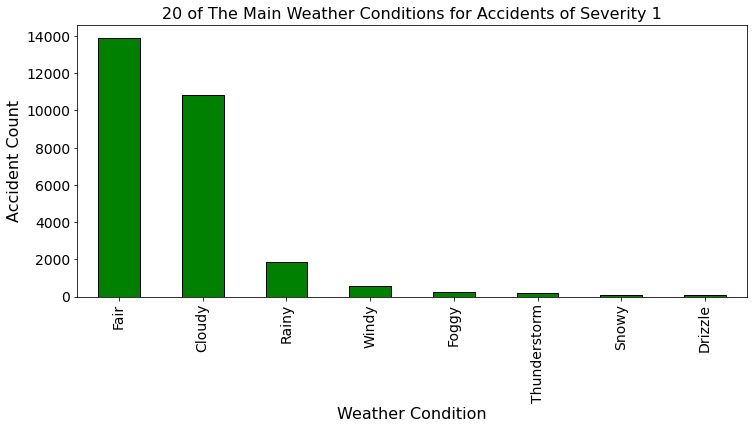

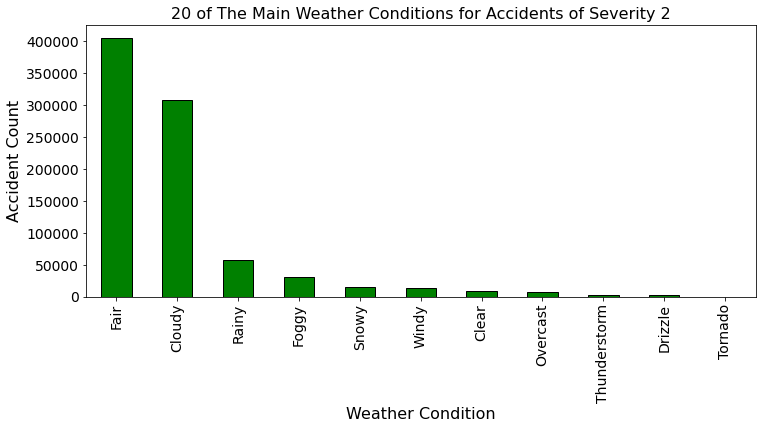

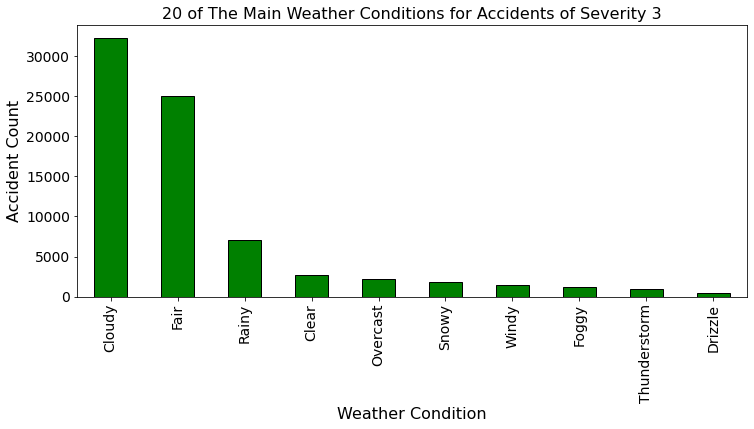

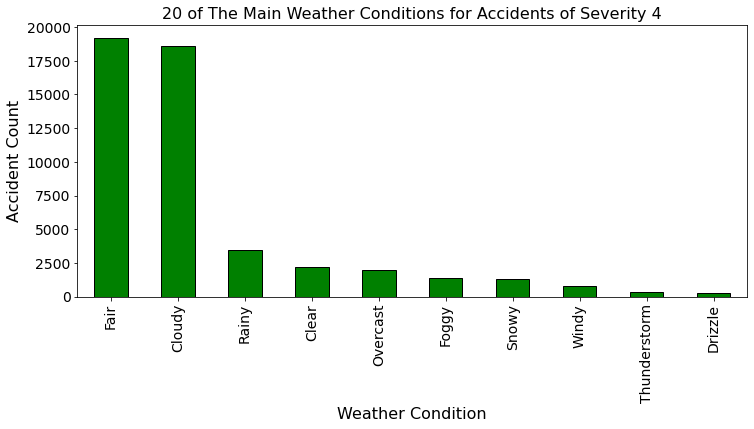

In [292]:
for s in np.arange(1,5):
    plt.subplots(figsize=(12,5))
    df.loc[df["Severity"] == s]['Weather_Condition'].value_counts().sort_values(ascending=False).head(30).plot.bar(width=0.5,color='g',edgecolor='k',align='center',linewidth=1)
    plt.xlabel('Weather Condition',fontsize=16)
    plt.ylabel('Accident Count',fontsize=16)
    plt.title('20 of The Main Weather Conditions for Accidents of Severity ' + str(s),fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

#### Explore cleaned weather conditions on number of accidents by Severty

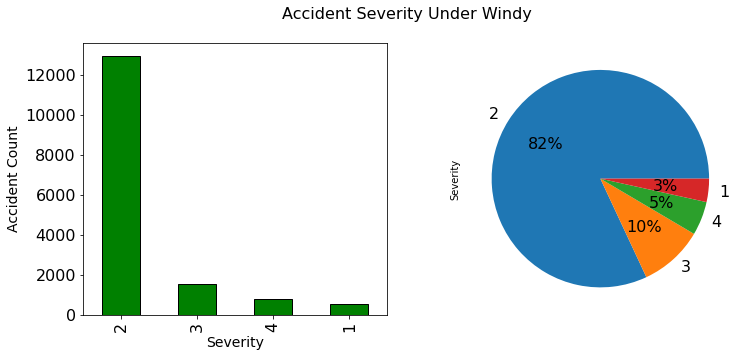

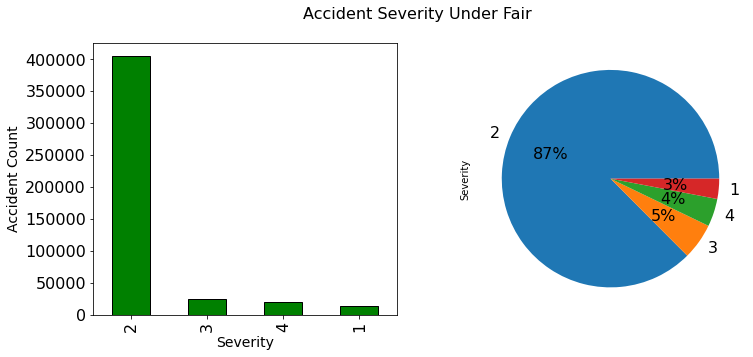

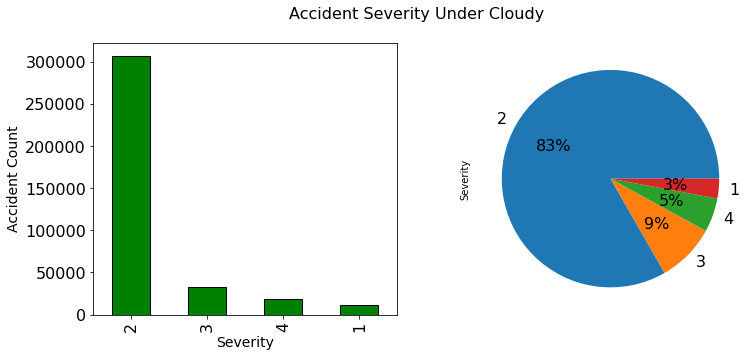

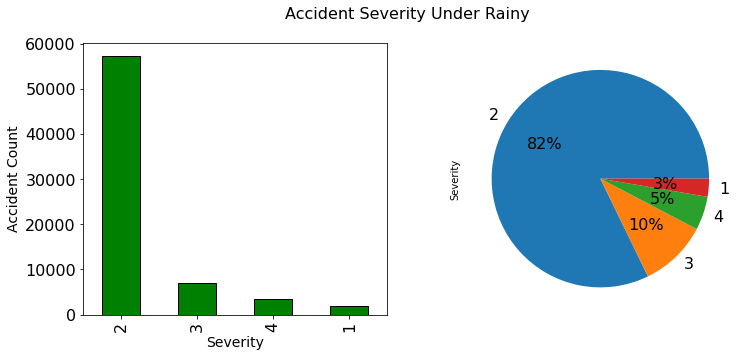

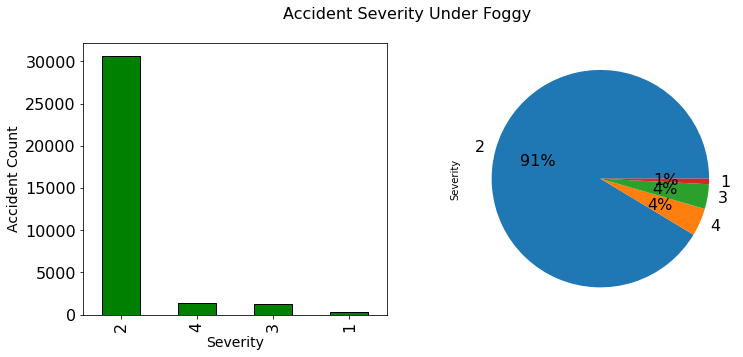

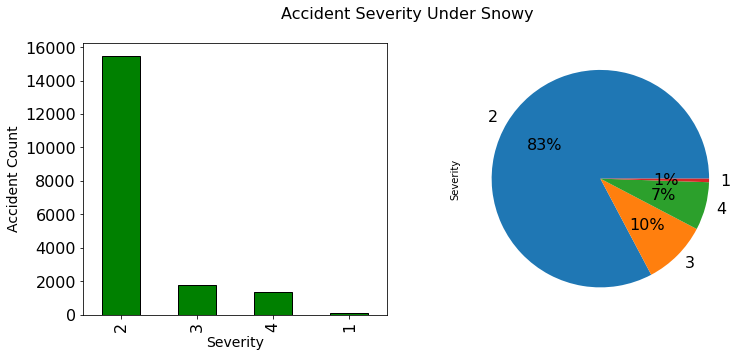

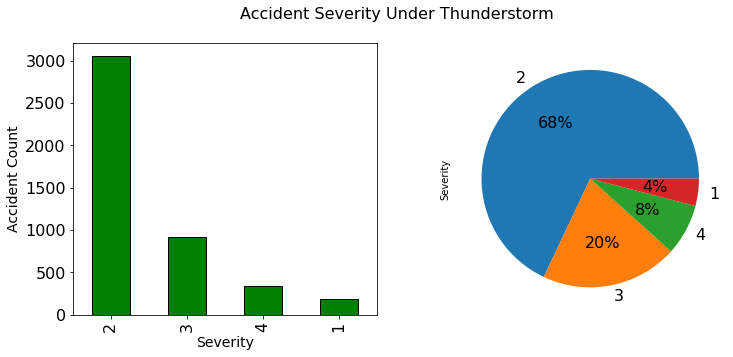

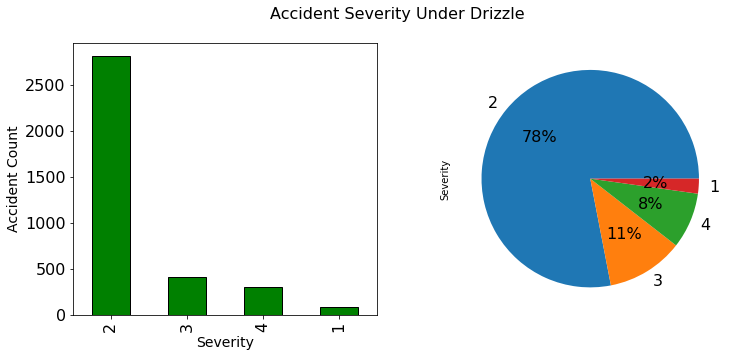

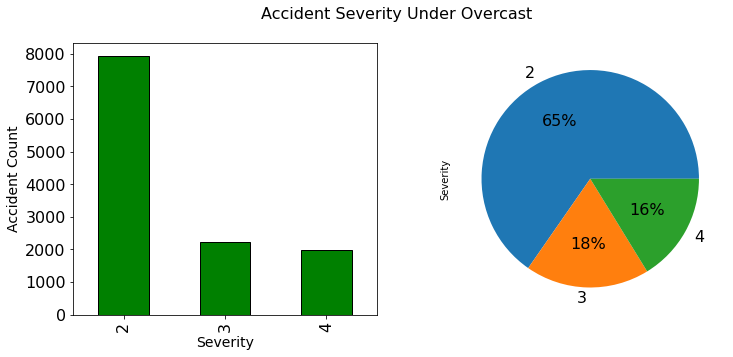

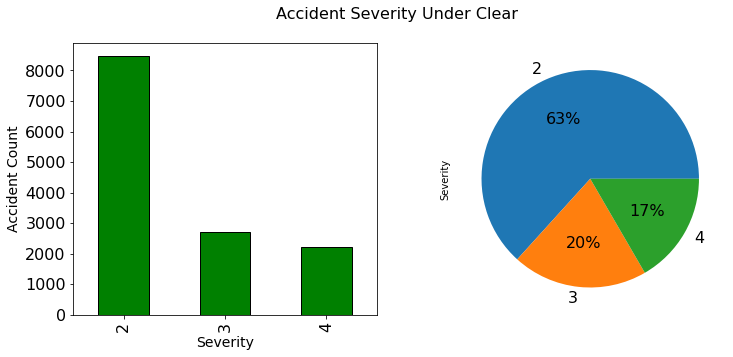

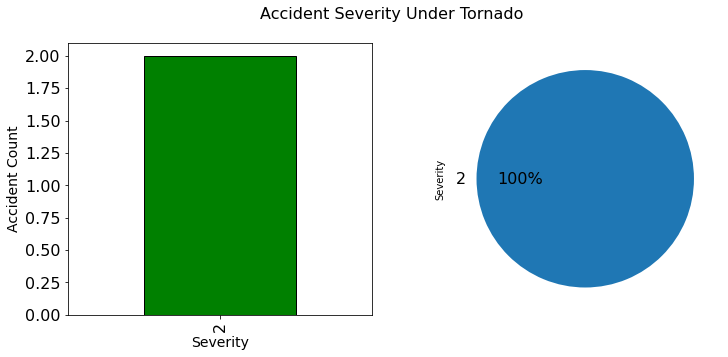

In [293]:
for s in df['Weather_Condition'].unique():
    plt.subplots(1,2,figsize=(12,5))
    plt.suptitle('Accident Severity Under ' + s,fontsize=16)
    plt.subplot(1,2,1)
    df.loc[df["Weather_Condition"] == s]['Severity'].value_counts().plot.bar(width=0.5,color='g',edgecolor='k',align='center',linewidth=1)
    plt.xlabel('Severity',fontsize=14)
    plt.ylabel('Accident Count',fontsize=14)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.subplot(1,2,2)
    df.loc[df["Weather_Condition"] == s]['Severity'].value_counts().plot.pie(autopct='%1.0f%%',fontsize=16)

#### Label encoding for converting categorical features to numerical

In [294]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [295]:
df['Amenity_num'] = labelencoder.fit_transform(df['Amenity'])
df['Bump_num'] = labelencoder.fit_transform(df['Bump'])
df['Crossing_num'] = labelencoder.fit_transform(df['Crossing'])
df['Give_Way_num'] = labelencoder.fit_transform(df['Give_Way'])
df['Junction_num'] = labelencoder.fit_transform(df['Junction'])
df['No_Exit_num'] = labelencoder.fit_transform(df['No_Exit'])
df['Railway_num'] = labelencoder.fit_transform(df['Railway'])
df['Roundabout_num'] = labelencoder.fit_transform(df['Roundabout'])
df['Station_num'] = labelencoder.fit_transform(df['Station'])
df['Stop_num'] = labelencoder.fit_transform(df['Stop'])
df['Traffic_Calming_num'] = labelencoder.fit_transform(df['Traffic_Calming'])
df['Traffic_Signal_num'] = labelencoder.fit_transform(df['Traffic_Signal'])
df['Side_num'] = labelencoder.fit_transform(df['Side'])
df['State_num'] = labelencoder.fit_transform(df['State'])
df['Sunrise_Sunset_num'] = labelencoder.fit_transform(df['Sunrise_Sunset'])
df['Weather_Condition_num'] = labelencoder.fit_transform(df['Weather_Condition'])

In [296]:
# Check columns again
df.columns

Index(['Severity', 'Distance(mi)', 'Side', 'State', 'Temperature(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset',
       'numeric_DayOfWeek', 'Amenity_num', 'Bump_num', 'Crossing_num',
       'Give_Way_num', 'Junction_num', 'No_Exit_num', 'Railway_num',
       'Roundabout_num', 'Station_num', 'Stop_num', 'Traffic_Calming_num',
       'Traffic_Signal_num', 'Side_num', 'State_num', 'Sunrise_Sunset_num',
       'Weather_Condition_num'],
      dtype='object')

In [297]:
for i in df.columns:
    print(i+": "+str(df[i].dtype))

Severity: int64
Distance(mi): float64
Side: object
State: object
Temperature(F): float64
Humidity(%): float64
Pressure(in): float64
Visibility(mi): float64
Wind_Speed(mph): float64
Precipitation(in): float64
Weather_Condition: object
Amenity: bool
Bump: bool
Crossing: bool
Give_Way: bool
Junction: bool
No_Exit: bool
Railway: bool
Roundabout: bool
Station: bool
Stop: bool
Traffic_Calming: bool
Traffic_Signal: bool
Sunrise_Sunset: object
numeric_DayOfWeek: int64
Amenity_num: int64
Bump_num: int64
Crossing_num: int64
Give_Way_num: int64
Junction_num: int64
No_Exit_num: int64
Railway_num: int64
Roundabout_num: int64
Station_num: int64
Stop_num: int64
Traffic_Calming_num: int64
Traffic_Signal_num: int64
Side_num: int32
State_num: int32
Sunrise_Sunset_num: int32
Weather_Condition_num: int32


In [298]:
# Drop original categorical features
df.drop(["Sunrise_Sunset","Amenity","Bump","Crossing","Give_Way",
         "Junction","No_Exit","Railway","Roundabout","Station","Stop",
         "Traffic_Calming","Traffic_Signal","Side","State", "Weather_Condition"], axis=1, inplace=True)

In [299]:
for i in df.columns:
    print(i+": "+str(df[i].dtype))

Severity: int64
Distance(mi): float64
Temperature(F): float64
Humidity(%): float64
Pressure(in): float64
Visibility(mi): float64
Wind_Speed(mph): float64
Precipitation(in): float64
numeric_DayOfWeek: int64
Amenity_num: int64
Bump_num: int64
Crossing_num: int64
Give_Way_num: int64
Junction_num: int64
No_Exit_num: int64
Railway_num: int64
Roundabout_num: int64
Station_num: int64
Stop_num: int64
Traffic_Calming_num: int64
Traffic_Signal_num: int64
Side_num: int32
State_num: int32
Sunrise_Sunset_num: int32
Weather_Condition_num: int32


### Target value

In this study we want to find the major severity and split our target in two class

#### defining the major severity by analyzing the length of the road extent affected by the accident. Actually, accidents that affected more length of the road, had more severity

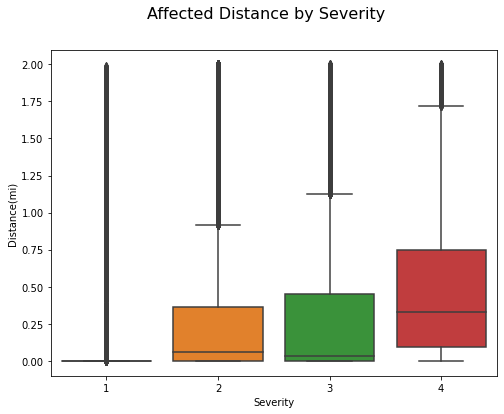

In [301]:
fig, axs = plt.subplots(figsize=(8, 6))
sns.boxplot(x="Severity", y="Distance(mi)", 
            data=df.loc[df['Distance(mi)']<2],ax=axs)
fig.suptitle('Affected Distance by Severity', fontsize=16)

plt.show()

Based on the result, the accidents with severity level 4 are much more serious than accidents of other levels. So I want to slit up the levels of severity into two levels, level 4 and other levels.

In [302]:
df['FinalSeverity'] = 0
df.loc[df['Severity'] == 4, 'FinalSeverity'] = 1
df = df.drop(['Severity'], axis = 1)
df.FinalSeverity.value_counts()

0    954197
1     49616
Name: FinalSeverity, dtype: int64

### Find Correlation between features

It is important to discover and quantify the degree to which variables in your dataset are dependent upon each other. This knowledge can help us better prepare your data to meet the expectations of machine learning algorithms, such as linear regression, whose performance will degrade with the presence of these interdependencies.
The performance of some algorithms can deteriorate if two or more variables are tightly related, called multicollinearity.

In [303]:
df.corr()

,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),numeric_DayOfWeek,Amenity_num,Bump_num,...,Roundabout_num,Station_num,Stop_num,Traffic_Calming_num,Traffic_Signal_num,Side_num,State_num,Sunrise_Sunset_num,Weather_Condition_num,FinalSeverity
Distance(mi),1.000000,-0.049421,0.046423,-0.035091,-0.019615,0.007953,0.001765,-0.005216,-0.023235,-0.002519,...,-0.002131,-0.038685,-0.014151,-0.003583,-0.095749,0.075745,0.071945,0.046730,0.016066,0.140595
Temperature(F),-0.049421,1.000000,-0.408067,0.095997,0.194400,0.099747,-0.003503,-0.008553,0.010658,0.002171,...,0.004603,0.056421,-0.006405,0.002663,0.101429,-0.011903,-0.221376,-0.344500,-0.107633,-0.009343
Humidity(%),0.046423,-0.408067,1.000000,0.177756,-0.350835,-0.168881,0.086642,0.050612,-0.004204,-0.005268,...,0.003462,-0.001717,-0.009123,-0.004059,-0.070316,-0.005507,0.143964,0.324932,0.080359,0.021640
Pressure(in),-0.035091,0.095997,0.177756,1.000000,-0.019136,-0.064934,0.002369,-0.010526,0.015789,0.001732,...,0.001014,0.051909,0.000756,0.004236,-0.005902,0.000994,-0.100324,0.038455,-0.056512,-0.007983
Visibility(mi),-0.019615,0.194400,-0.350835,-0.019136,1.000000,0.031903,-0.126325,0.000722,0.006750,0.003211,...,0.000222,0.017623,0.000638,0.002981,0.044008,-0.013313,-0.033527,-0.044043,-0.335478,-0.002957
Wind_Speed(mph),0.007953,0.099747,-0.168881,-0.064934,0.031903,1.000000,0.028975,-0.046355,0.004471,-0.000050,...,-0.001015,0.024212,-0.009317,-0.000673,0.042106,-0.016512,0.083596,-0.250089,0.210485,0.022023
Precipitation(in),0.001765,-0.003503,0.086642,0.002369,-0.126325,0.028975,1.000000,-0.001316,-0.001737,-0.000267,...,-0.000534,-0.001932,-0.004093,-0.000406,-0.007593,0.008394,0.008500,-0.008273,0.129044,-0.001954
numeric_DayOfWeek,-0.005216,-0.008553,0.050612,-0.010526,0.000722,-0.046355,-0.001316,1.000000,-0.002064,-0.001830,...,0.002366,-0.005392,0.004965,-0.001755,-0.021483,-0.000186,-0.010566,0.069619,-0.008729,-0.000578
Amenity_num,-0.023235,0.010658,-0.004204,0.015789,0.006750,0.004471,-0.001737,-0.002064,1.000000,0.005477,...,0.000877,0.125702,0.025580,0.009051,0.093525,-0.057783,0.027764,-0.008358,-0.006152,0.006783
Bump_num,-0.002519,0.002171,-0.005268,0.001732,0.003211,-0.000050,-0.000267,-0.001830,0.005477,1.000000,...,-0.000106,0.005032,0.013423,0.786341,-0.003185,-0.003042,-0.007382,0.002372,-0.000538,-0.001387


Text(0.5, 1.0, 'Correlation Heatmap')

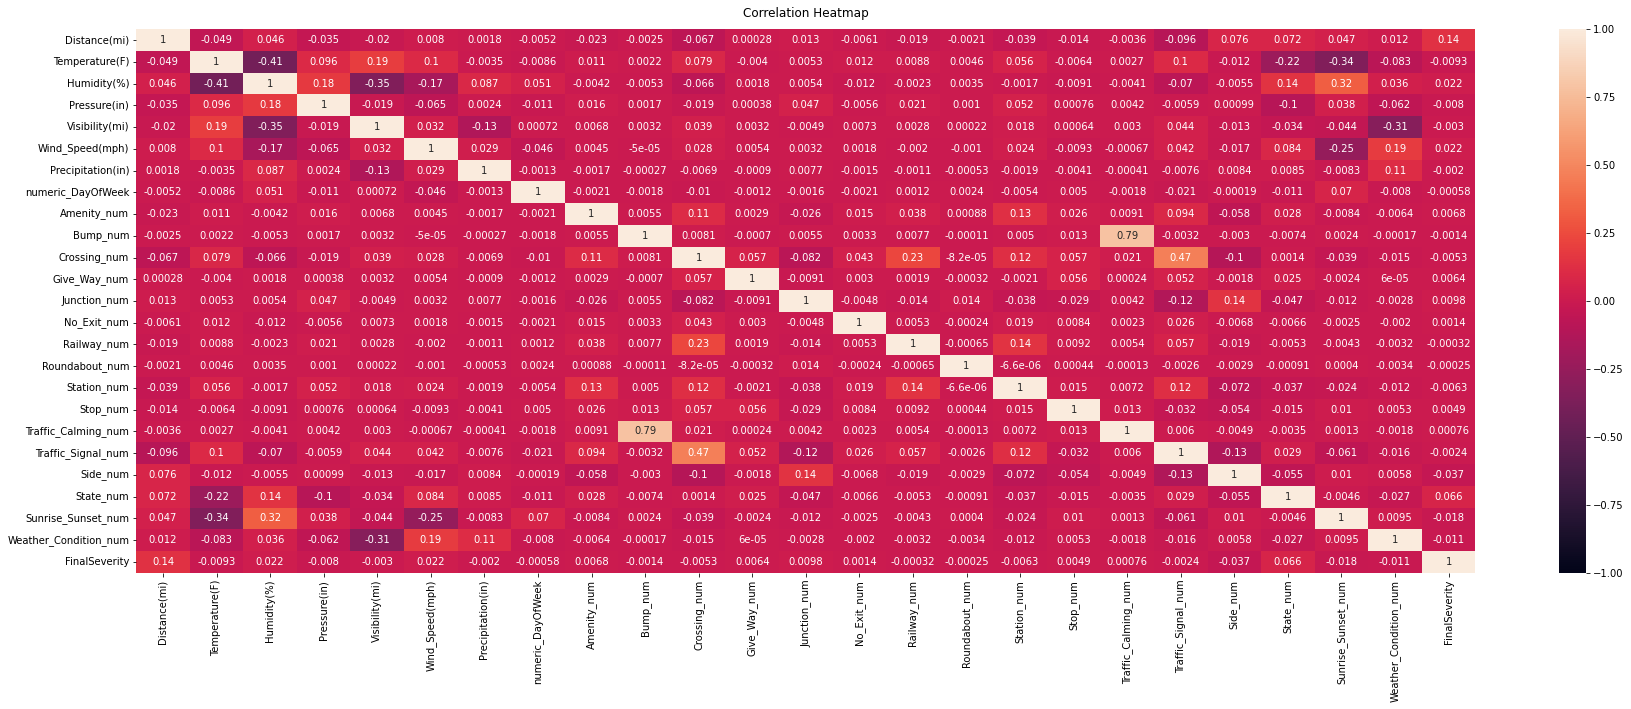

In [240]:
plt.figure(figsize=(30, 10))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

Correlations are acceptable

## Data Preparation for Modeling

import packages

In [242]:
from sklearn.model_selection import GridSearchCV, KFold, train_test_split, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

### Spliting Train Test

In [243]:
X = df.drop('FinalSeverity', axis=1)
y= df['FinalSeverity']

# split train, test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

#### Check if the target label is balanced

In [245]:
df.groupby('FinalSeverity').size()

FinalSeverity
0    954197
1     49616
dtype: int64

#### As you can see the dataset is not balanced and we need to figure it out, we will use under-sampling technique (while modeling) to address this issue

## Modeling

### To be Continued ...